<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


# Adaptive Fourier Filtering


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Imaging/Adaptive_Fourier_Filter.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Imaging/Adaptive_Fourier_Filter.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2023

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into Fourier Filtering of images.


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.


In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2025.3.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
print('done')


installing pyTEMlib
done


In [1]:
import csv


## Loading of necessary libraries

Please note, that we only need to load the pyTEMlib library, which is based on sidpy Datasets. 



In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pylab as plt 
import sys
import scipy

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import sys
sys.path.insert(0, '../../')

%load_ext autoreload
%autoreload 2
import pyTEMlib


if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
    
print('pyTEMlib version: ', pyTEMlib.__version__)
print('sidpy version', sidpy.__version__)
note_book_version = '2025.05.19'
note_book_name='pyTEMib/notebooks/Imaging/Adaptive_Fourier_Filter'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher
pyTEMlib version:  0.2025.07.0
sidpy version 0.12.7


## Open File

The data are held in the memory in the **sidpy** format with rather extensive capabilities.

All results can be stored in that **NSID** format file. 

First we select the file and the dataset (the dropdown menu at the bottom), in case there are several.

In [3]:
fileWidget = pyTEMlib.file_tools.FileWidget()

In [25]:
import h5py
h5_file = h5py.File(fileWidget.file_name, mode='r+')


In [42]:
h5_file['Data']['Image'].keys()

<KeysViewHDF5 ['29c1a096334e4d00a113a40658276c6a', '3fe8ac69069a44c98a03d73f6e467e57', '833fd4db371b47a98bf9e8c5622aec8b', '88f3b377a4d944cabaebee90d0908198', 'f0eee0de16c345778daf792622101f22', 'f4952a9421184f1f87472055c6770640']>

<HDF5 dataset "Data": shape (1616, 170, 1), type "<u2">


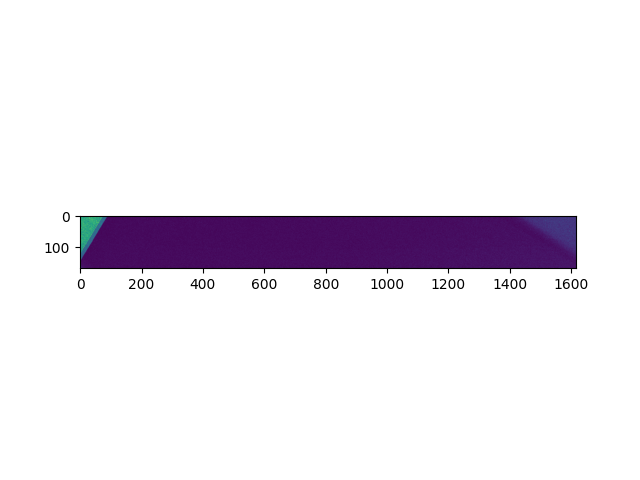

In [59]:
data_array = h5_file['Data']['Image']['3fe8ac69069a44c98a03d73f6e467e57']['Data']
print(data_array)
plt.figure()
plt.imshow(np.array(data_array)[:,:,0].T)

In [67]:
import json
metadata_array =  h5_file['Data']['Image']['29c1a096334e4d00a113a40658276c6a']['Metadata'][:, 0]
metadata_string = metadata_array.tobytes().decode("utf-8")
metadata = dict(json.loads(metadata_string.rstrip('\x00')))
metadata

{'Core': {'MetadataDefinitionVersion': '7.9',
  'MetadataSchemaVersion': 'v1/2013/07',
  'guid': '00000000000000000000000000000000',
  'UserId': 'yzhao65'},
 'Instrument': {'ControlSoftwareVersion': '3.21.1',
  'Manufacturer': 'FEI Company',
  'InstrumentId': '4018',
  'InstrumentClass': 'Titan',
  'InstrumentModel': 'Spectra',
  'ComputerName': 'TITAN52340180'},
 'Acquisition': {'AcquisitionStartDatetime': {'DateTime': '1751400967'},
  'AcquisitionDatetime': {'DateTime': '0'},
  'BeamType': '',
  'SourceType': 'XFEG'},
 'Optics': {'GunLensSetting': '777.25067138671875',
  'ExtractorVoltage': '3600.03662109375',
  'AccelerationVoltage': '200000',
  'SpotIndex': '7',
  'C1LensIntensity': '-0.45199774718761859',
  'C2LensIntensity': '0.19410951924463052',
  'C3LensIntensity': '0.35430084129721517',
  'ObjectiveLensIntensity': '0.82398502199325219',
  'IntermediateLensIntensity': '0.060336265199823894',
  'DiffractionLensIntensity': '0.19139078553472397',
  'Projector1LensIntensity': '0.2

In [148]:
data_array = h5_file['SharedProperties']['EDSSpectrumQuantificationSettings']['c87c8b86325b44e29d8bc5876a408b8f']
data_array[0].decode("utf-8")

'{"absorptionCorrection": {"density": 1, "enabled": false, "sampleThickness": 4.9999999999999998e-08, "useDensity": false}, "backgroundCorrection": "/SharedProperties/BackgroundCorrection/bbe110b945fc4f28b3044a5a110c4da2", "backgroundWindows": "/SharedProperties/BackgroundWindows/17b8ab62e108485ab797579d7313bdc0", "elementProperties": [{"atomicShellFamily": "K", "defaultLineSelect": true, "element": 0, "includeInAutoPeakId": true, "quantify": true}, {"atomicShellFamily": "K", "defaultLineSelect": true, "element": 1, "includeInAutoPeakId": true, "quantify": true}, {"atomicShellFamily": "K", "defaultLineSelect": true, "element": 2, "includeInAutoPeakId": true, "quantify": true}, {"atomicShellFamily": "K", "defaultLineSelect": true, "element": 3, "includeInAutoPeakId": true, "quantify": true, "xrayTransitions": [{"from": "L3", "to": "K"}]}, {"atomicShellFamily": "K", "defaultLineSelect": true, "element": 4, "includeInAutoPeakId": true, "quantify": true, "xrayTransitions": [{"from": "L3", 

In [124]:
metadata = dict(json.loads(data_array[0].to.rstrip('\x00')))

AttributeError: 'bytes' object has no attribute 'tobytes'

In [150]:
(h5_file['Info'])[0].decode("utf-8")

'{\n    "applicationVersion": "3.17.0.967-b5399cab"\n}\n'

In [200]:
h5_file['Data']['SpectrumStream']['3e8d521d544b48898e2d2947615f4933']['AcquisitionSettings'].keys()

AttributeError: 'Dataset' object has no attribute 'keys'

In [206]:
h5_file['Data']['SpectrumStream']['3e8d521d544b48898e2d2947615f4933']['Metadata']

<HDF5 dataset "Metadata": shape (60000, 609), type "|u1">

In [207]:
metadata_array =  h5_file['SharedProperties']['EDSSpectrumQuantificationSettings']['c87c8b86325b44e29d8bc5876a408b8f']
metadata_string = metadata_array[0].decode("utf-8")
metadata = dict(json.loads(metadata_string.rstrip('\x00')))
dict(json.loads(metadata_string.rstrip('\x00')))
metadata

{'absorptionCorrection': {'density': 1,
  'enabled': False,
  'sampleThickness': 5e-08,
  'useDensity': False},
 'backgroundCorrection': '/SharedProperties/BackgroundCorrection/bbe110b945fc4f28b3044a5a110c4da2',
 'backgroundWindows': '/SharedProperties/BackgroundWindows/17b8ab62e108485ab797579d7313bdc0',
 'elementProperties': [{'atomicShellFamily': 'K',
   'defaultLineSelect': True,
   'element': 0,
   'includeInAutoPeakId': True,
   'quantify': True},
  {'atomicShellFamily': 'K',
   'defaultLineSelect': True,
   'element': 1,
   'includeInAutoPeakId': True,
   'quantify': True},
  {'atomicShellFamily': 'K',
   'defaultLineSelect': True,
   'element': 2,
   'includeInAutoPeakId': True,
   'quantify': True},
  {'atomicShellFamily': 'K',
   'defaultLineSelect': True,
   'element': 3,
   'includeInAutoPeakId': True,
   'quantify': True,
   'xrayTransitions': [{'from': 'L3', 'to': 'K'}]},
  {'atomicShellFamily': 'K',
   'defaultLineSelect': True,
   'element': 4,
   'includeInAutoPeakId': 

In [85]:
h5_file['SharedProperties']['EDSSpectrumQuantificationSettings']['.keys()']


<HDF5 dataset "c87c8b86325b44e29d8bc5876a408b8f": shape (1,), type "|O">

Now, we open and plot the selected dataset. Select another one and rerun only cell below (Home button gets you back to original).
>
> Please note that you can zoom and drag the intensity values in the color-bar.
>

In [17]:
chooser = pyTEMlib.file_tools.ChooseDataset(fileWidget.datasets)

Dropdown(description='select dataset:', options=('Channel_000: BF-S', 'Channel_001: SuperXG2', 'Channel_002: S…

We really would need an image here


dict_keys(['Channel_000', 'Channel_001', 'Channel_002', 'Channel_003', 'Channel_004', 'Channel_005', 'Channel_006', 'Channel_007', 'Channel_008', 'Channel_009'])

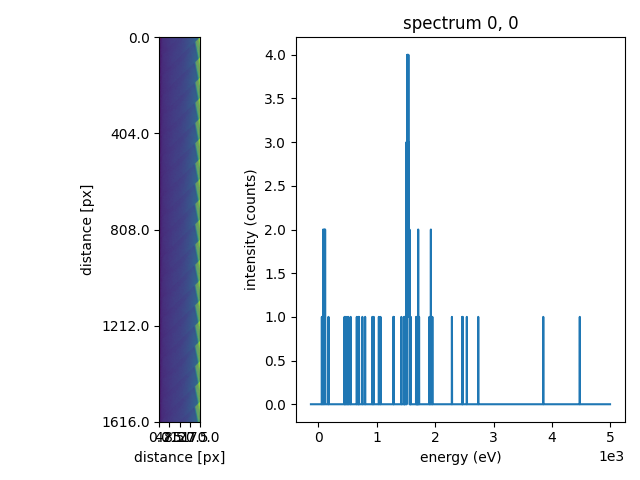

In [7]:
datasets = fileWidget.datasets
dataset = fileWidget.selected_dataset

if dataset.data_type.name != 'IMAGE':
    print('We really would need an image here')

view = dataset.plot()
datasets.keys()

In [16]:
dataset.view_original_metadata()

Core :
	MetadataDefinitionVersion : 7.9
	MetadataSchemaVersion : v1/2013/07
	guid : 00000000000000000000000000000000
Instrument :
	ControlSoftwareVersion : 3.21.1
	Manufacturer : FEI Company
	InstrumentId : 4018
	InstrumentClass : Titan
	InstrumentModel : Spectra
	ComputerName : TITAN52340180
Acquisition :
	AcquisitionStartDatetime :
		DateTime : 1751400967
	AcquisitionDatetime :
		DateTime : 0
	BeamType : 
	SourceType : XFEG
Optics :
	GunLensSetting : 777.25067138671875
	ExtractorVoltage : 3600.03662109375
	AccelerationVoltage : 200000
	SpotIndex : 7
	C1LensIntensity : -0.45199774718761859
	C2LensIntensity : 0.19410951924463052
	C3LensIntensity : 0.35430084129721517
	ObjectiveLensIntensity : 0.82398502199325219
	IntermediateLensIntensity : 0.060336265199823894
	DiffractionLensIntensity : 0.19139078553472397
	Projector1LensIntensity : 0.28091570010789807
	Projector2LensIntensity : 0.91034079367771092
	LorentzLensIntensity : 0
	MiniCondenserLensIntensity : 0.34343613593964234
	BeamConve

(170, 1616, 2048)

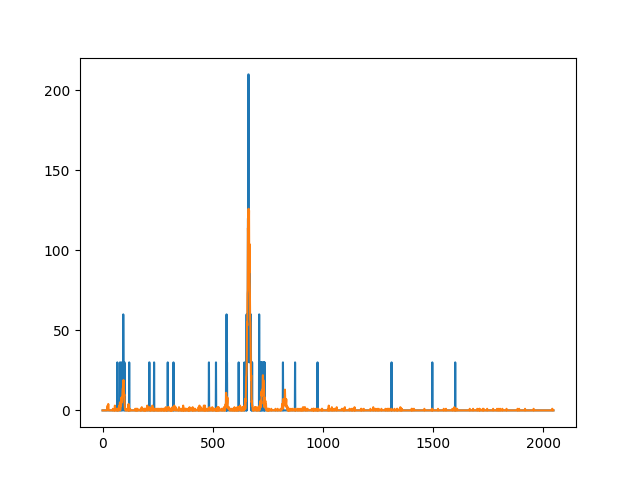

In [23]:
f = dataset[10,200:230,:].sum(axis=[0])
f2 = dataset[10,200,:]
plt.figure()
plt.plot(f2*30)
plt.plot(f)

dataset.shape

In [59]:
dataset.y.slope

5.876975015606945

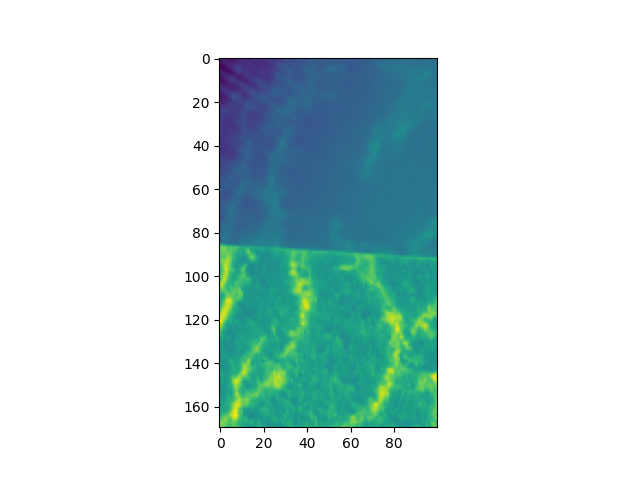

In [63]:
plt.figure()
plt.imshow(haadf[100:200].T)


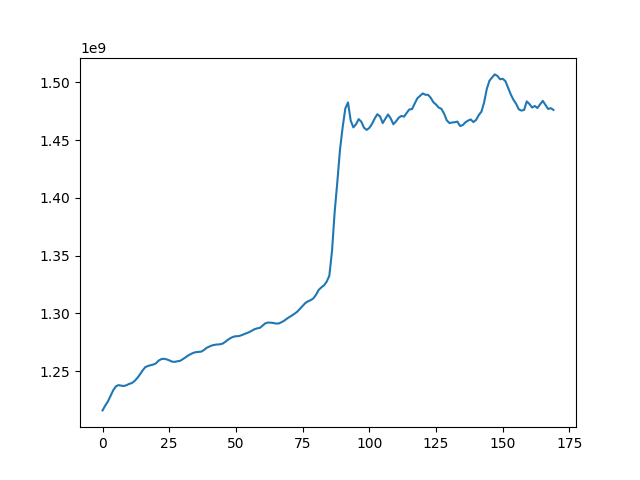

In [64]:
plt.figure()
plt.plot(haadf[100:200].sum(axis=0))


KeyboardInterrupt



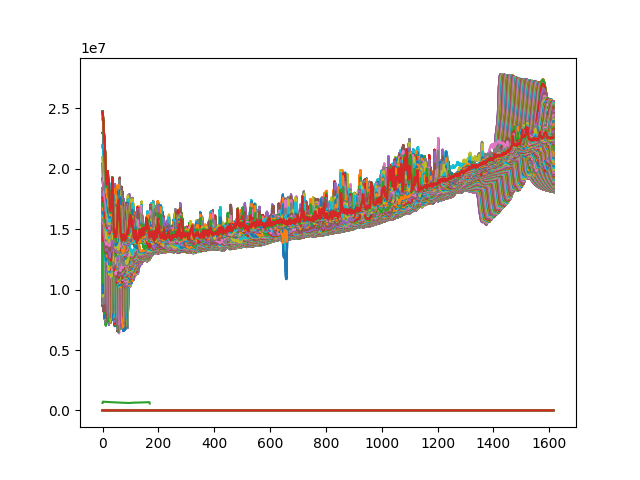

In [68]:

profile = []
for key in ['Channel_001', 'Channel_002','Channel_004', 'Channel_005']:
    profile = datasets[key][100:200].sum(axis=0)
    profiles.append(profile)
plt.figure()
for profile in profiles:
    plt.plot(profile)



In [56]:
plt.close('all')

[26.96005723 38.12727858] 3.141592653589793 1.5707963267948966
124 origins found


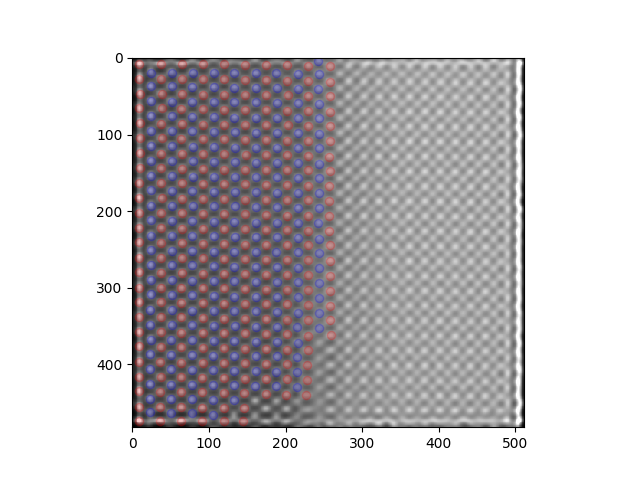

In [68]:

def analyze_atomic_structure(dataset, crystal, start_atom_index, tolerance=1.5):
    graph = dataset.metadata['atoms']['positions']
    
    layer = pyTEMlib.crystal_tools.get_projection(crystal)
    gamma = np.radians(layer.cell.angles()[2])
    rotation_angle = np.radians(crystal.info['experimental']['angle'])
                        
    length = (layer.cell.lengths() /10/dataset.x.slope)[:2]
    a = np.array([np.cos(rotation_angle)*length[0], np.sin(rotation_angle)*length[0]])
    b = np.array([np.cos(rotation_angle+gamma)*length[1], np.sin(rotation_angle+gamma)*length[1]])
    base = layer.get_scaled_positions()
    base[:, :2] = np.dot(base[:, :2],[a,b])
    projection_tags = {'lattice_vector': {'a': a, 'b': b},
                       'allowed_variation': tolerance,
                       'distance_unit_cell':  np.max(length)*1.04,
                       'start_atom_index': start_atom_index,
                       'base': base}
    layer.info['projection'] = projection_tags

    origins, ideal = pyTEMlib.graph_tools.breadth_first_search(blobs[:,:2], start_atom_index, layer)
    dataset.metadata['atoms']['projection'] = layer
    sublattices = pyTEMlib.graph_tools.get_base_atoms(graph[:, :2], origins, base[:, :2], tolerance=2)
    
    dataset.metadata['atoms']['origins'] = origins
    dataset.metadata['atoms']['ideal_origins'] = ideal
    dataset.metadata['atoms']['sublattices'] = sublattices
    dataset.metadata['atoms']['base'] = base
    
    return sublattices

crystal = pyTEMlib.crystal_tools.structure_by_name('aluminium')
crystal.info['experimental']={'zone_axis': [0, 1, 1], 'angle': 180}

sublattice_indices = pyTEMlib.graph_tools.analyze_atomic_structure(dataset, crystal, 186, tolerance=1.5)
sublattice_indices                                   
base = dataset.metadata['atoms']['projection_tags']['base']
blobs = dataset.metadata['atoms']['positions']
plt.figure()
plt.imshow(dataset.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(dataset))+3*np.std(np.array(dataset)))
base = dataset.metadata['atoms']['projection_tags']['base']
for i, sub_lattice in enumerate(sublattice_indices):
    if base[i, 2] > 0.5:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(blobs[sub_lattice, 0], blobs[sub_lattice, 1], c=color, alpha = 0.2)

In [69]:
dataset.metadata['atoms'].keys()

dict_keys(['positions', 'size', 'projection', 'origins', 'ideal_origins', 'sublattices', 'projection_tags'])

[38.12727858 38.51436747] 3.141592653589793 1.5707963267948968
252 origins found
12


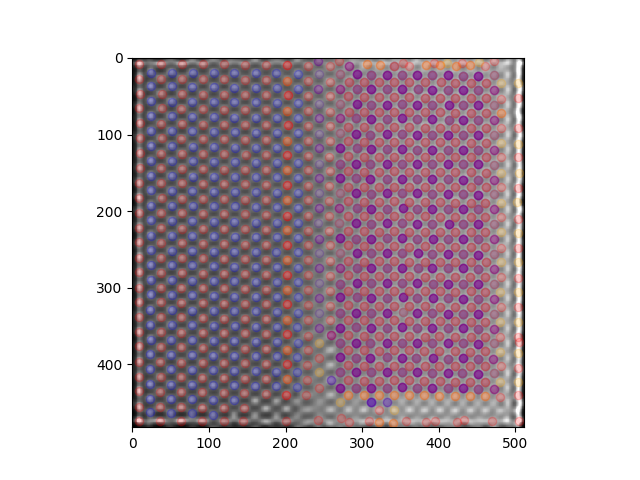

In [76]:
crystal = pyTEMlib.crystal_tools.structure_by_name('theta_prime')
crystal.info['experimental']={'zone_axis': [1, 0, 1], 'angle': 180}

sublattice_indices2 = pyTEMlib.graph_tools.analyze_atomic_structure(dataset, crystal, 717, tolerance=4.8)
print(len(sublattice_indices2))                                   

blobs = dataset.metadata['atoms']['positions']
np.max(blobs, axis=1)

plt.figure()
plt.imshow(dataset.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(dataset))+3*np.std(np.array(dataset)))
for i, sub_lattice in enumerate(sublattice_indices2):
    if dataset.metadata['atoms']['projection_tags']['base'][i, 2] < 0.2:
        color = 'red'
    elif dataset.metadata['atoms']['projection_tags']['base'][i, 2] < 0.4:
        color = 'blue'
    
    elif dataset.metadata['atoms']['projection_tags']['base'][i, 2] < 0.7:
        color = 'orange'
    else:
        color = 'purple'
   
    plt.scatter(blobs[sub_lattice, 0], blobs[sub_lattice, 1], c=color, alpha = 0.2)
for i, sub_lattice in enumerate(sublattice_indices):
    if base[i, 2] > 0.5:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(blobs[sub_lattice, 0], blobs[sub_lattice, 1], c=color, alpha = 0.2)

In [79]:
np.max(blobs, axis=0)
len 
del_blobsblobs[:,0] < 5]

array([506.       , 482.       ,   4.7712026], dtype=float32)

In [51]:
np.round(np.unique(np.round(dataset.metadata['atoms']['projection_tags']['base'][:,2],2))*3,0)

array([0., 1., 2., 3.])

{'lattice_vector': {'a': array([26.96005723,  0.        ]), 'b': array([1.65082739e-15, 2.69600572e+01])}, 'allowed_variation': 1.5, 'distance_unit_cell': 28.038459519347416, 'start_atom_index': 676, 'base': array([[8.25413695e-16, 1.34800286e+01, 2.66666667e-01],
       [1.34800286e+01, 0.00000000e+00, 3.33333333e-01],
       [1.34800286e+01, 0.00000000e+00, 1.00000000e+00],
       [8.25413695e-16, 1.34800286e+01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34800286e+01, 1.34800286e+01, 6.66666667e-01]])}


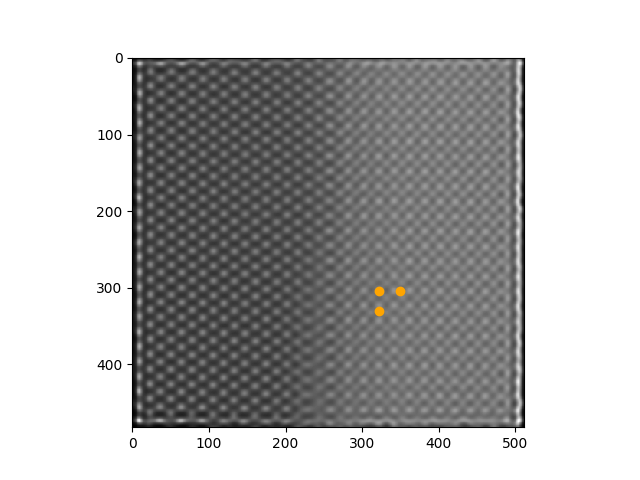

In [29]:
print(dataset.metadata['atoms']['projection_tags'])
a = dataset.metadata['atoms']['projection_tags']['lattice_vector']['a']
b = dataset.metadata['atoms']['projection_tags']['lattice_vector']['b']
blobs = dataset.metadata['atoms']['positions']
init = 676
plt.figure()
plt.imshow(dataset.T, interpolation='nearest',cmap='gray')
plt.scatter(blobs[init, 0], blobs[init, 1], c='orange')
plt.scatter((blobs[init,:2]+a)[0], (blobs[init,:2]+a)[1], c='orange')
plt.scatter((blobs[init,:2]+b)[0], (blobs[init,:2]+b)[1], c='orange')


projected atomic numbers
Atoms(symbols='Al4Cu2', pbc=[True, True, False], cell=[5.727564927611035, 5.785714285714286, 1.4318912319027588], tags=...)


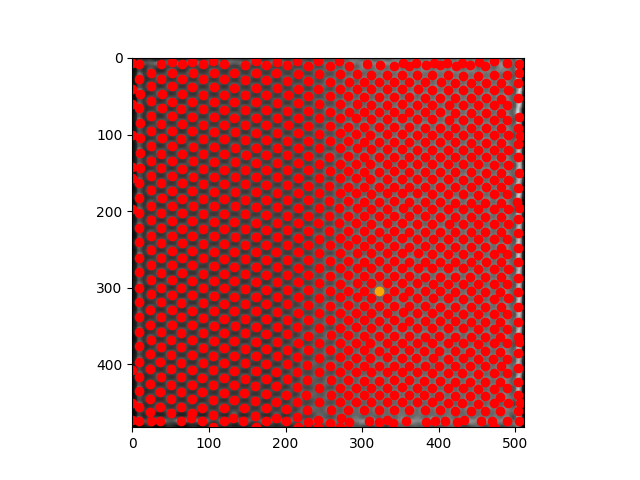

In [62]:
crystal = pyTEMlib.crystal_tools.structure_by_name('theta_prime')
crystal.info['experimental']={'zone_axis': [1, 0, 1], 'angle': 0}

layer = pyTEMlib.crystal_tools.get_projection(crystal)
print(layer)
blobs = dataset.metadata['atoms']['positions']

plt.figure()
plt.imshow(dataset.T, interpolation='nearest',cmap='gray')
#plt.scatter(one_grain[:, 0], one_grain[:, 1], c='blue', alpha = 0.2)

# init = np.argmin(np.linalg.norm(blobs[:,:2]- [674, 594], axis=1))
#init = np.argmin(np.linalg.norm(blobs[:,:2]- [610, 552], axis=1))
init = 676
plt.scatter(blobs[:, 0], blobs[:, 1], c='red')
plt.scatter(blobs[init, 0], blobs[init, 1], c='orange')

In [69]:
gamma = np.radians(layer.cell.angles()[2])
one_grain_angle = 0
length = (layer.cell.lengths() /10/dataset.x.slope)[:2]
length, np.round(layer.get_scaled_positions(),3)

(array([38.12727858, 38.51436747]),
 array([[0.25, 0.2 , 1.  ],
        [0.75, 0.25, 1.  ],
        [0.75, 0.75, 1.  ],
        [0.25, 0.75, 1.  ],
        [0.  , 0.  , 0.  ],
        [0.5 , 0.5 , 0.  ]]))

{'lattice_vector': {'a': array([38.12727858,  0.        ]),
  'b': array([2.35832484e-15, 3.85143675e+01])},
 'allowed_variation': 2,
 'distance_unit_cell': 40.054942170496304,
 'start_atom_index': 676,
 'base': array([[9.53181964e+00, 7.70287349e+00, 1.00000000e+00],
        [2.85954589e+01, 9.62859187e+00, 1.00000000e+00],
        [2.85954589e+01, 2.88857756e+01, 1.00000000e+00],
        [9.53181964e+00, 2.88857756e+01, 1.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.90636393e+01, 1.92571837e+01, 1.86616479e-17]])}

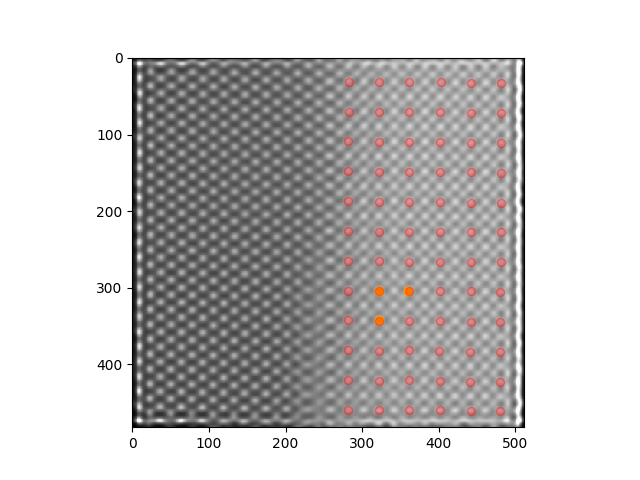

In [64]:
import pyTEMlib.graph_tools
plt.close('all')
image = dataset
init = np.argmin(np.linalg.norm(blobs[:,:2]- [812, 199], axis=1))


a = np.array([np.cos(one_grain_angle)*length[0], np.sin(one_grain_angle)*length[0]])
b = np.array([np.cos(one_grain_angle+gamma)*length[1], np.sin(one_grain_angle+gamma)*length[1]])
base = layer.get_scaled_positions()
base[:, :2] = np.dot(base[:, :2],[a,b])
init = 676
#plt.scatter(blobs[init][0], blobs[init][1], c='orange')
projection_tags = {'lattice_vector': {'a': a, 'b': b},
                   'allowed_variation': 2,
                   'distance_unit_cell':  np.max(length)*1.04,
                   'start_atom_index': init,
                   'base': base}
layer.info['projection'] = projection_tags
init = 676


hop1, ideal = pyTEMlib.graph_tools.breadth_first_search(blobs[:,:2], init, layer)

plt.figure()
plt.imshow(image.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
plt.scatter(blobs[init, 0], blobs[init, 1], c='orange')
plt.scatter((blobs[init,:2]+a) [0], (blobs[init,:2]+a)[1], c='orange')
plt.scatter((blobs[init,:2]+b) [0], (blobs[init,:2]+b)[1], c='orange')
plt.scatter(hop1[:,0], hop1[:,1], c='red', alpha = 0.3)

layer.info['projection']

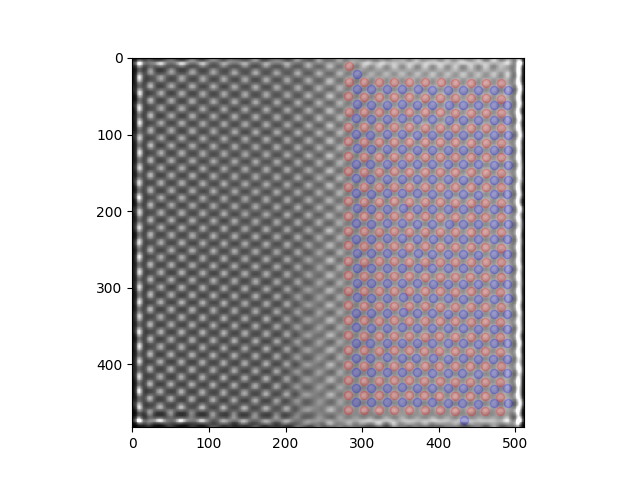

In [58]:
import scipy
def get_base_atoms(graph, origins, base, tolerance=3):
    sublattices = []
    neighbour_tree = scipy.spatial.KDTree(graph)
    for base_atom in base:
         distances, indices = neighbour_tree.query(origins+base_atom[:2], k=50) 
         sublattices.append(indices[distances < tolerance]) 
    return sublattices

base = layer.get_scaled_positions()
base[:, :2] = np.dot(base[:, :2],[a,b])
sublattice_indices = get_base_atoms(blobs[:,:2], hop1, base[:,:2])

plt.figure()
plt.imshow(image.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
for i, sub_lattice in enumerate(sublattice_indices):
    if base[i, 2] > 0.5:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(blobs[sub_lattice, 0], blobs[sub_lattice, 1], c=color, alpha = 0.2)

In [57]:
dataset.x.slope*21, 4.03/np.sqrt(2)/dataset.x

C:\Users\gduscher\AppData\Local\Temp\ipykernel_31628\2202695786.py:1: RuntimeWarning: divide by zero encountered in divide
  dataset.x.slope*21, 4.03/np.sqrt(2)/dataset.x


(0.31546668938414874, x:  Length (nm) of size (512,))

In [10]:
blobs

{'positions': array([[  9.       , 474.       ,   2.8856013],
        [505.       , 474.       ,   2.8856013],
        [  9.       ,   8.       ,   2.8856013],
        ...,
        [  0.       ,  60.       ,   1.       ],
        [  0.       , 157.       ,   1.       ],
        [  0.       , 143.       ,   1.       ]], dtype=float32),
 'size': 0.1,
 'projection': Atoms(symbols='Al4', pbc=[True, True, False], cell=[4.05, 5.727564927611035, 1.4318912319027588], tags=...),
 'origins': array([[120., 282.],
        [147., 282.],
        [ 92., 282.],
        [120., 321.],
        [120., 243.],
        [175., 283.],
        [147., 244.],
        [147., 321.],
        [ 65., 281.],
        [ 92., 320.],
        [ 92., 243.],
        [119., 360.],
        [120., 204.],
        [202., 283.],
        [175., 244.],
        [175., 322.],
        [147., 360.],
        [ 37., 281.],
        [ 65., 242.],
        [ 64., 320.],
        [ 92., 359.],
        [ 92., 204.],
        [119., 399.],
        

In [28]:
dataset.metadata['atoms']['projection'].info['projection']['base']

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.16731124e-15, 1.90636393e+01, 1.86616479e-17],
       [1.34800286e+01, 2.85954589e+01, 1.00000000e+00],
       [1.34800286e+01, 9.53181964e+00, 1.00000000e+00]])

In [98]:
base =np.dot(layer.get_scaled_positions()[:,:2],[a,b])


In [52]:
layer.cell

Cell([[-1.8146981453231288, 3.6206864875822644, 0.0], [-5.120423935839844, -2.5663707287292707, 0.0], [0.0, 0.0, 1.4318912319027588]])

In [14]:
import h5py
import SciFiReaders
nsid_reader = SciFiReaders.NSIDReader(fileWidget.file_name)
sidpy_datasets = nsid_reader.read()
sidpy_datasets['_relationship']

{'structures': {'Crystal_000': {'angle': 0.0,
   'name': 'aluminum',
   'zone_axis': array([0, 1, 1])}}}

In [19]:
(sidpy_dataset.h5_dataset.name)

'/Measurement_000/Channel_004/LRdeconvol_DemonReg/LRdeconvol_DemonReg'

In [16]:

_main_dsets = []
def read_all(recursive=True, parent=None):
        
        if parent is None:
            h5_group = hdf5_file
        else:
            if not isinstance(parent, h5py.Group):
                raise TypeError('parent should be a h5py.Group object')
            self.__validate_obj_in_same_file(parent)
            h5_group = parent

        if recursive:
            list_of_main = _main_dsets
            keys = ['Channel_{:03}'.format(i) for i in range(len(list_of_main))]
        else:
            list_of_main = []
            keys = []
            for key in h5_group:
                if isinstance(h5_group[key], h5py.Dataset):
                    if check_if_main(h5_group[key]):
                        list_of_main.append(h5_group[key])
                        keys.append(key)

        # Go through each of the identified
        dictionary_of_datasets = {}
        for i,dset in enumerate(list_of_main):
            dictionary_of_datasets[keys[i]] = read_h5py_dataset(dset)
        return dictionary_of_datasets

read_all(recursive=True)

{}

In [21]:
from pyNSID.io.hdf_utils import check_if_main, get_all_main, read_h5py_dataset, h5_group_to_dict

main = get_all_main(hdf5_file)

i = 0
if '_relationship' in hdf5_file[main[i].parent.parent.parent.name].keys():
    g =  hdf5_file[main[i].parent.parent.parent.name] 
    print(g)
    p = h5_group_to_dict(g['_relationship'])
p['_relationship']
hdf5_file[main[i].parent.parent.parent.name].keys()

NameError: name 'hdf5_file' is not defined

In [22]:
import sidpy
hdf5_file = h5py.File(fileWidget.file_name, 'r+')
print(hdf5_file["Measurement_000"].keys())
sidpy.hdf_utils.print_tree(hdf5_file)


<KeysViewHDF5 ['Channel_004', '_relationship']>
/
├ Measurement_000
  ---------------
  ├ Channel_004
    -----------
    ├ LRdeconvol_DemonReg
      -------------------
      ├ LRdeconvol_DemonReg
      ├ metadata
        --------
        ├ analysis
          --------
          ├ background_correction
            ---------------------
          ├ non_rigid_demon_registration
            ----------------------------
          ├ rigid_registration
            ------------------
        ├ atoms
          -----
        ├ experiment
          ----------
        ├ fourier
          -------
        ├ plot
          ----
      ├ provenance
        ----------
        ├ sidpy
          -----
          ├ parent_data
            -----------
            ├ provenance
              ----------
              ├ sidpy
                -----
                ├ parent_data
                  -----------
                  ├ provenance
                    ----------
                    ├ sidpy
                

In [23]:
hdf5_file.close()

In [6]:
#power_spectrum.add_provenance('jup', 'kkle', 1)
print(dataset.provenance)
im = dataset.sum(axis=0)
im.provenance

{'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:30.740127', 'parent_data': {'title': 'Sum-DemonReg_new_new', 'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:27.585951', 'parent_data': {'title': 'Sum-DemonReg_new', 'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:27.554767', 'parent_data': {'title': 'Sum-DemonReg', 'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:11:33.909983', 'parent_data': {'title': 'DemonReg-HAADF', 'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:07:26.160958', 'parent_data': {'title': 'RigidReg-HAADF', 'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:03:16.254320', 'parent_data': {'title': 'Rigid_Registration', 'provenance': {'sidpy': {'from_array_': '_0.12.7_2025-07-08-16:03:16.254320'}}}}}}}}}}}}}}}}}}}}


{'sidpy': {'like_data': '_0.12.7_2025-07-10-10:54:47.894292',
  'parent_data': {'title': 'LRdeconvol_DemonReg',
   'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:30.740127',
     'parent_data': {'title': 'Sum-DemonReg_new_new',
      'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:27.585951',
        'parent_data': {'title': 'Sum-DemonReg_new',
         'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:14:27.554767',
           'parent_data': {'title': 'Sum-DemonReg',
            'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:11:33.909983',
              'parent_data': {'title': 'DemonReg-HAADF',
               'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:07:26.160958',
                 'parent_data': {'title': 'RigidReg-HAADF',
                  'provenance': {'sidpy': {'like_data': '_0.12.7_2025-07-08-16:03:16.254320',
                    'parent_data': {'title': 'Rigid_Registration',
                     'prov

## Power Spectrum of Image

fft :
	smoothing : 1
	minimum_intensity : 11.103847889613466
	maximum_intensity : 21.181684397201778
source:  LRdeconvol_DemonReg


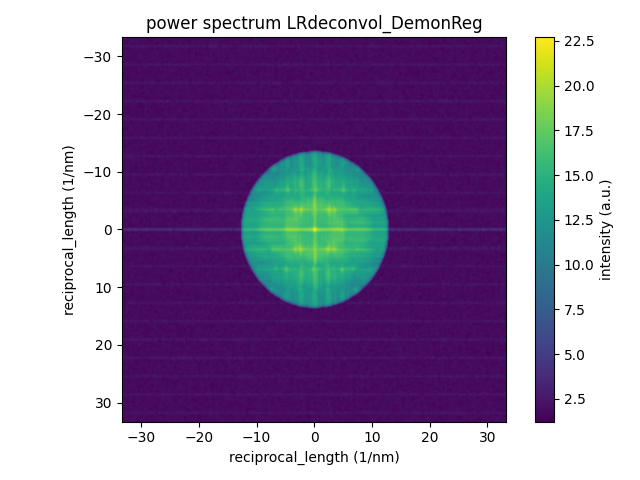

In [4]:
if dataset.data_type.name == 'IMAGE_STACK':
  stack_dim = dataset.get_dimensions_by_type('TEMPORAL')
  image = dataset.sum(axis=stack_dim)
  image.data_type = 'Image'
elif dataset.data_type.name == 'IMAGE':
  image = dataset
else:
  print('We really would need an image here')

power_spectrum = pyTEMlib.image_tools.power_spectrum(image, smoothing=1)
power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = power_spectrum.plot()

## Spot Detection in Fourier Transform

Change the spot_threshold value slightly up or down (down is more spots)

Found 19 reflections


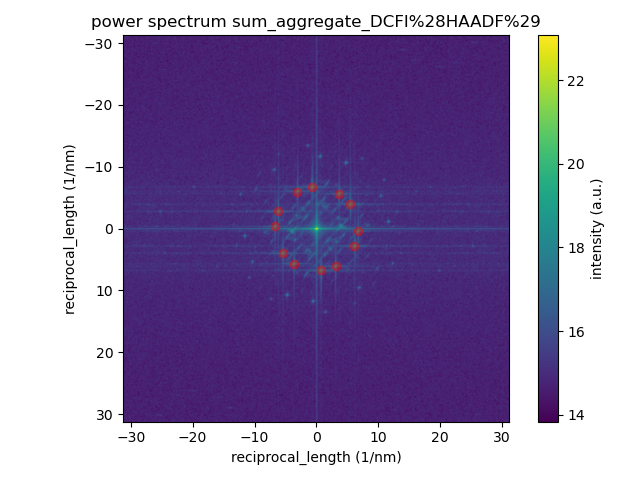

In [8]:
# ------Input----------
spot_threshold=0.15
# ---------------------

spots, _ = pyTEMlib.image_tools.diffractogram_spots(power_spectrum, spot_threshold=spot_threshold)
spots = spots[np.linalg.norm(spots[:,:2],axis=1)<7,:]
spots = spots[np.linalg.norm(spots[:,:2],axis=1)>0.5,:]
power_spectrum.plot()

plt.gca().scatter(spots[:,0],spots[:,1], color='red', alpha=0.4);

In [9]:
dataset.provenance

{'sidpy': {'from_array_': '_0.12.7_2025-03-19-18:27:18.331601'}}

## Adaptive Fourier Filter

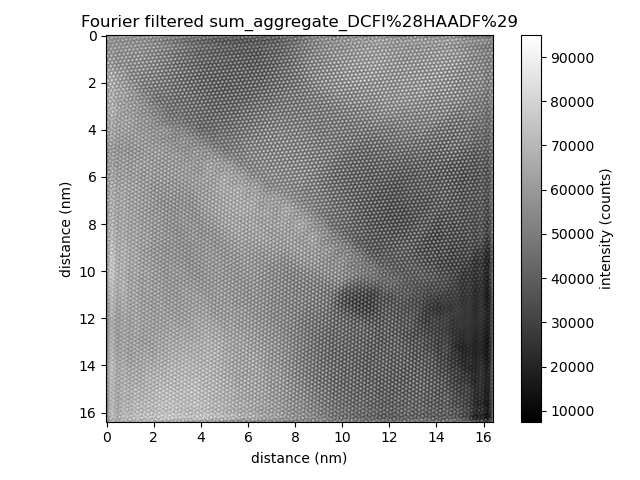

In [10]:
filtered_dataset = pyTEMlib.image_tools.adaptive_fourier_filter(image, spots, 
                                                                low_pass=2.0, reflection_radius=.3)
view = filtered_dataset.plot(cmap='gray')

Let's see what we did - In Fourier space, of course.

fft :
	smoothing : 1
	minimum_intensity : 13.52620834490971
	maximum_intensity : 21.520821921762174
source:  sum_aggregate_DCFI%28HAADF%29


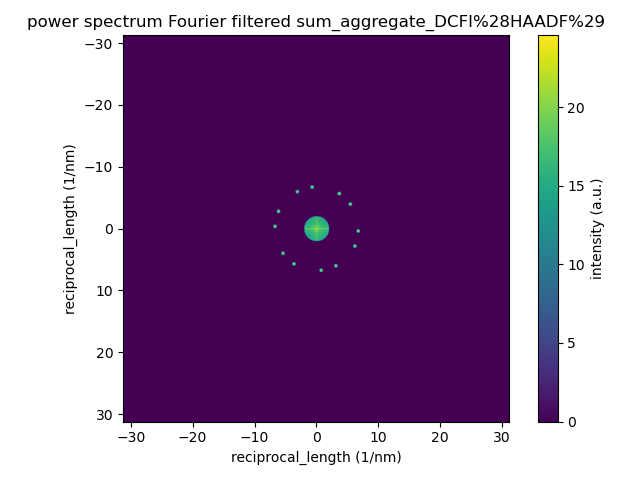

In [11]:
filtered_power_spectrum = pyTEMlib.image_tools.power_spectrum(filtered_dataset, smoothing=0)

power_spectrum.view_metadata()
print('source: ', power_spectrum.source)
view = filtered_power_spectrum.plot()

Please note that the spots are ordered from center to outside.

The third parameter of a spot is its angle.

In [12]:
print(spots[:5])

[[-6.70853549 -0.36592012 -1.62528778]
 [ 6.70853549  0.36592012  1.51630487]
 [ 5.42781508 -3.96413461  2.20159394]
 [-5.42781508  3.96413461 -0.93999871]
 [-3.110321   -5.97669526 -2.66175213]]


## Log the result

In [13]:
filtered_dataset.title = 'Fourier_Filtered_Image'
datasets.update({'Log_000': filtered_dataset})

### Save Datasets to file

In [12]:
group = pyTEMlib.file_tools.save_dataset(datasets, filename=dataset.metadata['filename'])

Cannot overwrite file. Using:  p1-3-hr3-1.hf5


C:\Users\gduscher\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:p1-3-hr3 to p1_3_hr3
  warn('main_data_name should not contain the "-" character. Reformatted'
C:\Users\gduscher\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


A convenient function to select a dataset (for further processing, visualization or whatever)

In [13]:
chooser = pyTEMlib.file_tools.ChooseDataset(datasets)

Dropdown(description='select dataset:', options=('Channel_000: p1-3-hr3', 'Log_000: Fourier_Filtered_Image'), …

In [14]:
chooser.dataset.metadata

{'analysis': 'adaptive fourier filtered',
 'spots': array([[-2.62027028,  2.21908057, -0.86811058],
        [ 2.62027028, -2.21908057,  2.27348207],
        [-3.4226497 ,  0.43880124, -1.44328677],
        [ 3.4226497 , -0.43880124,  1.69830589],
        [-3.22205484, -1.25371784, -1.94187537],
        [ 3.22205484,  1.25371784,  1.19971728],
        [ 1.31640373, -3.23459202,  2.75508635],
        [-1.31640373,  3.23459202, -0.38650631],
        [-2.10624597, -2.80832796, -2.49809154],
        [ 2.10624597,  2.80832796,  0.64350111],
        [-3.51040995,  0.33850382, -1.47466498],
        [ 3.51040995, -0.33850382,  1.66692768],
        [-0.60178456, -3.48533559, -2.97061654],
        [ 0.60178456,  3.48533559,  0.17097612],
        [-2.21908057, -2.93369974, -2.49400159],
        [ 2.21908057,  2.93369974,  0.64759107],
        [-4.73905343,  3.67339327, -0.91140362],
        [ 4.73905343, -3.67339327,  2.23018903],
        [-5.52889567, -2.36952671, -1.97568811],
        [ 5.528895

A tree-like plot of the file

In [15]:
print(dataset.h5_dataset.file.filename)
pyTEMlib.file_tools.h5_tree(dataset.h5_dataset.file)

C:\Users\gduscher\Documents\Github\pyTEMlib\example_data\p1-3-hr3-1.hf5
/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ p1_3_hr3
      --------
      ├ metadata
        --------
        ├ experiment
          ----------
      ├ original_metadata
        -----------------
        ├ DM
          --
        ├ DocumentObjectList
          ------------------
          ├ 0
            -
            ├ AnnotationGroupList
              -------------------
              ├ 0
                -
                ├ Font
                  ----
                ├ ObjectTags
                  ----------
            ├ ImageDisplayInfo
              ----------------
              ├ DimensionLabels
                ---------------
              ├ MainSliceId
                -----------
            ├ ObjectTags
              ----------
        ├ DocumentTags
          ------------
        ├ Image Behavior
          --------------
          ├ UnscaledTransform
            ----------

## Close File
let's close the file but keep the filename

In [16]:
filename = dataset.h5_dataset.file.filename
dataset.h5_dataset.file.close()

## Simulate new notebook
We can now simulate a new notebook and open the file again.



In [17]:
new_dataset= pyTEMlib.file_tools.open_file(filename)
choose_image = pyTEMlib.file_tools.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: p1_3_hr3', 'Log_000: Fourier_Filtered_Image'), …

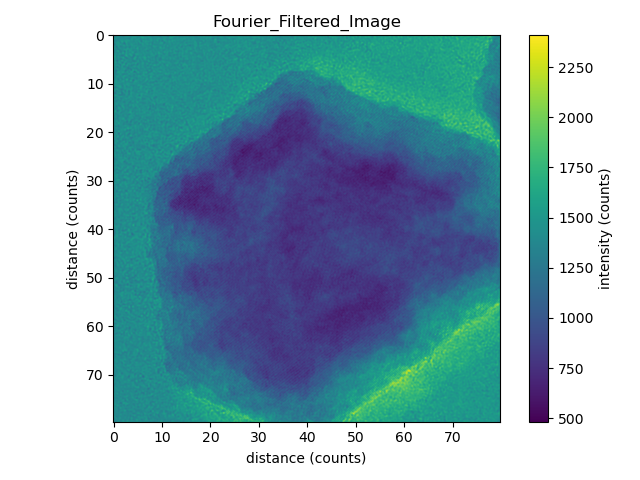

In [18]:
view = choose_image.dataset.plot()

We want to make an image operation of the images in the file.

In [19]:
choose_image = pyTEMlib.file_tools.ChooseDataset(new_dataset)
print('       subtract')
choose_image2 = pyTEMlib.file_tools.ChooseDataset(new_dataset)

Dropdown(description='select dataset:', options=('Channel_000: p1_3_hr3', 'Log_000: Fourier_Filtered_Image'), …

       subtract


Dropdown(description='select dataset:', options=('Channel_000: p1_3_hr3', 'Log_000: Fourier_Filtered_Image'), …

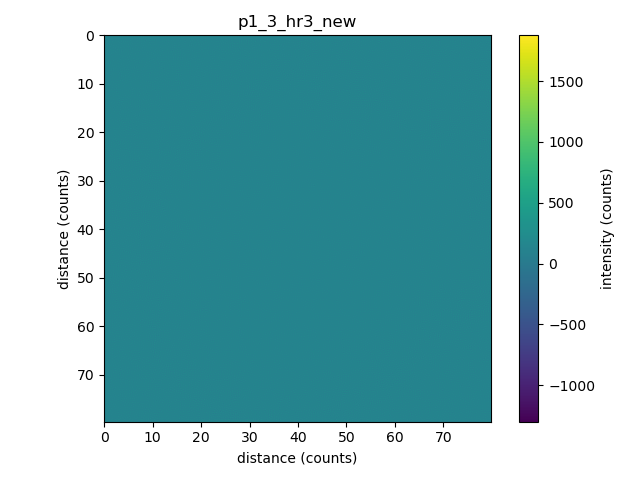

In [20]:
new_image = np.array(choose_image.dataset) - np.array(choose_image2.dataset)
new_image = choose_image.dataset.like_data(new_image)
vew = new_image.plot()

In [21]:
choose_image.dataset.metadata

{'filename': 'C:\\Users\\gduscher\\Documents\\Github\\pyTEMlib\\example_data\\p1-3-hr3.dm3',
 'experiment': {'acceleration_voltage': 199990.28125,
  'exposure_time': 1.0,
  'microscope': 'Libra 200 MC'}}